In [1]:
from heapq import merge

import kagglehub

# Download latest version
path = kagglehub.dataset_download("psparks/instacart-market-basket-analysis")

print("Path to dataset files:", path)


C:\Users\asemf\PycharmProjects\Fall2025_DS230_Final-project\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: C:\Users\asemf\.cache\kagglehub\datasets\psparks\instacart-market-basket-analysis\versions\1


In [2]:
import pandas as pd
import numpy as np

In [3]:
aisles = pd.read_csv(path + "/aisles.csv")
departments = pd.read_csv(path + "/departments.csv")
orders = pd.read_csv(path + "/orders.csv")
order_products__prior = pd.read_csv(path + "/order_products__prior.csv")
order_products__train = pd.read_csv(path + "/order_products__train.csv")
products = pd.read_csv(path + "/products.csv")

In [4]:
print("shape of aisles:",aisles.shape)
print("shape of departments:",departments.shape)
print("shape of order_products__prior:",order_products__prior.shape)
print("shape of order_products__train:",order_products__train.shape)
print("shape of orders:",orders.shape)
print("shape of products:",products.shape)

shape of aisles: (134, 2)
shape of departments: (21, 2)
shape of order_products__prior: (32434489, 4)
shape of order_products__train: (1384617, 4)
shape of orders: (3421083, 7)
shape of products: (49688, 4)


In [5]:
print("aisles exploration:")
print(aisles.head())
print(aisles.tail())
print(aisles.info())

aisles exploration:
   aisle_id                       aisle
0         1       prepared soups salads
1         2           specialty cheeses
2         3         energy granola bars
3         4               instant foods
4         5  marinades meat preparation
     aisle_id                       aisle
129       130    hot cereal pancake mixes
130       131                   dry pasta
131       132                      beauty
132       133  muscles joints pain relief
133       134  specialty wines champagnes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB
None


In [6]:
print("departments exploration:")
print(departments.head())
print(departments.tail())
print(departments.info())

departments exploration:
   department_id department
0              1     frozen
1              2      other
2              3     bakery
3              4    produce
4              5    alcohol
    department_id department
16             17  household
17             18     babies
18             19     snacks
19             20       deli
20             21    missing
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 468.0+ bytes
None


In [7]:
print("order_products__prior exploration:")
print(order_products__prior.head())
print(order_products__prior.tail())
print(order_products__prior.info())

order_products__prior exploration:
   order_id  product_id  add_to_cart_order  reordered
0         2       33120                  1          1
1         2       28985                  2          1
2         2        9327                  3          0
3         2       45918                  4          1
4         2       30035                  5          0
          order_id  product_id  add_to_cart_order  reordered
32434484   3421083       39678                  6          1
32434485   3421083       11352                  7          0
32434486   3421083        4600                  8          0
32434487   3421083       24852                  9          1
32434488   3421083        5020                 10          1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32434489 entries, 0 to 32434488
Data columns (total 4 columns):
 #   Column             Dtype
---  ------             -----
 0   order_id           int64
 1   product_id         int64
 2   add_to_cart_order  int64
 3   reorde

In [8]:
print("order_products__train exploration:")
print(order_products__train.head())
print(order_products__train.tail())
print(order_products__train.info())

order_products__train exploration:
   order_id  product_id  add_to_cart_order  reordered
0         1       49302                  1          1
1         1       11109                  2          1
2         1       10246                  3          0
3         1       49683                  4          0
4         1       43633                  5          1
         order_id  product_id  add_to_cart_order  reordered
1384612   3421063       14233                  3          1
1384613   3421063       35548                  4          1
1384614   3421070       35951                  1          1
1384615   3421070       16953                  2          1
1384616   3421070        4724                  3          1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1384617 entries, 0 to 1384616
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype
---  ------             --------------    -----
 0   order_id           1384617 non-null  int64
 1   product_id         1

In [9]:
print("orders exploration:")
print(orders.head())
print(orders.tail())
print(orders.info())
print(orders.eval_set.unique())

orders exploration:
   order_id  user_id eval_set  order_number  order_dow  order_hour_of_day  \
0   2539329        1    prior             1          2                  8   
1   2398795        1    prior             2          3                  7   
2    473747        1    prior             3          3                 12   
3   2254736        1    prior             4          4                  7   
4    431534        1    prior             5          4                 15   

   days_since_prior_order  
0                     NaN  
1                    15.0  
2                    21.0  
3                    29.0  
4                    28.0  
         order_id  user_id eval_set  order_number  order_dow  \
3421078   2266710   206209    prior            10          5   
3421079   1854736   206209    prior            11          4   
3421080    626363   206209    prior            12          1   
3421081   2977660   206209    prior            13          1   
3421082    272231   206209   

In [10]:
print("products exploration:")
print(products.head())
print(products.tail())
print(products.info())

products exploration:
   product_id                                       product_name  aisle_id  \
0           1                         Chocolate Sandwich Cookies        61   
1           2                                   All-Seasons Salt       104   
2           3               Robust Golden Unsweetened Oolong Tea        94   
3           4  Smart Ones Classic Favorites Mini Rigatoni Wit...        38   
4           5                          Green Chile Anytime Sauce         5   

   department_id  
0             19  
1             13  
2              7  
3              1  
4             13  
       product_id                                product_name  aisle_id  \
49683       49684   Vodka, Triple Distilled, Twist of Vanilla       124   
49684       49685          En Croute Roast Hazelnut Cranberry        42   
49685       49686                            Artisan Baguette       112   
49686       49687  Smartblend Healthy Metabolism Dry Cat Food        41   
49687       49688   

In [11]:
static_info = pd.merge(products, aisles, on='aisle_id')
static_into =  pd.merge(static_info, departments, on='department_id')
print(static_info)

       product_id                                       product_name  \
0               1                         Chocolate Sandwich Cookies   
1               2                                   All-Seasons Salt   
2               3               Robust Golden Unsweetened Oolong Tea   
3               4  Smart Ones Classic Favorites Mini Rigatoni Wit...   
4               5                          Green Chile Anytime Sauce   
...           ...                                                ...   
49683       49684          Vodka, Triple Distilled, Twist of Vanilla   
49684       49685                 En Croute Roast Hazelnut Cranberry   
49685       49686                                   Artisan Baguette   
49686       49687         Smartblend Healthy Metabolism Dry Cat Food   
49687       49688                             Fresh Foaming Cleanser   

       aisle_id  department_id                       aisle  
0            61             19               cookies cakes  
1           1

In [12]:
merged_prior = pd.merge(static_info, order_products__prior, on='product_id')
merged_prior = pd.merge(merged_prior, orders, on='order_id')
merged_prior.head()

,product_id,product_name,aisle_id,department_id,aisle,order_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1,Chocolate Sandwich Cookies,61,19,cookies cakes,1107,7,0,38259,prior,2,1,11,7.0
1,1,Chocolate Sandwich Cookies,61,19,cookies cakes,5319,3,1,196224,prior,65,1,14,1.0
2,1,Chocolate Sandwich Cookies,61,19,cookies cakes,7540,4,1,138499,prior,8,0,14,7.0
3,1,Chocolate Sandwich Cookies,61,19,cookies cakes,9228,2,0,79603,prior,2,2,10,30.0
4,1,Chocolate Sandwich Cookies,61,19,cookies cakes,9273,30,0,50005,prior,1,1,15,NaN


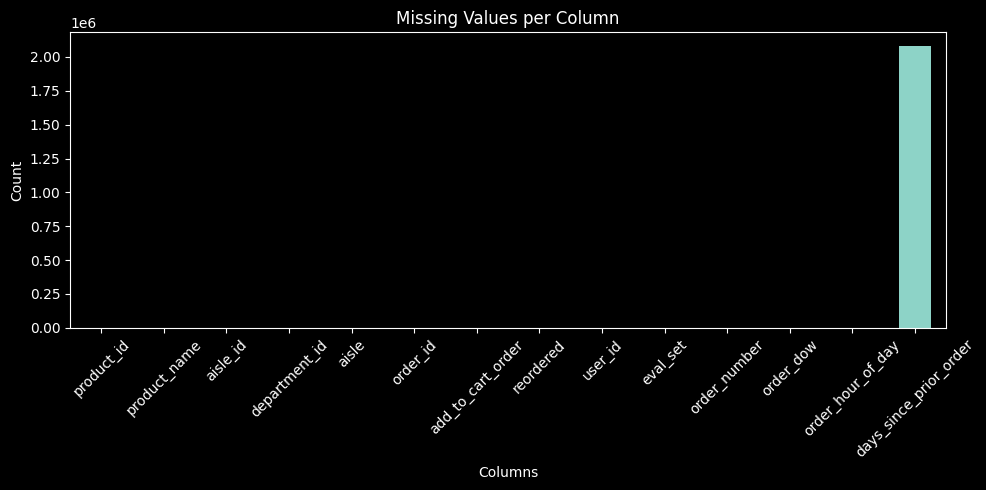

In [13]:
#Missing value analysis and visualization
import matplotlib.pyplot as plt
missing_count = merged_prior.isna().sum()
plt.figure(figsize = (10,5))
missing_count.plot(kind='bar')
plt.title("Missing Values per Column")
plt.ylabel("Count")
plt.xlabel("Columns")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


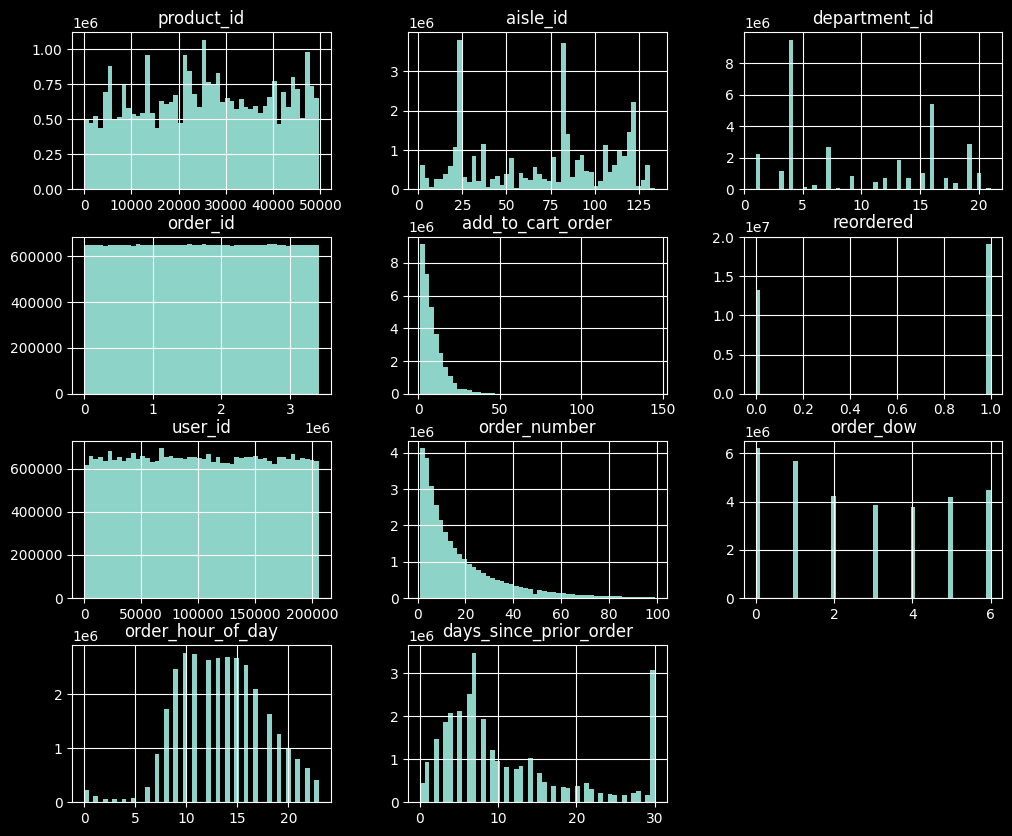

In [14]:
merged_prior.hist(bins=50, figsize=(12, 10))
plt.show()